<a href="https://colab.research.google.com/github/olyviah82/compilerconstruction/blob/main/A_labactivity5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

121455 Olyviah Nyaboke 
120174 Cynthia Gichuki 
121759 Shamsa Abdullahi 

Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails




> Syntax Analysis also known as parsing: In every programming lannguage has precise rules that prescribes the syntactic structure of well-formed programs.


>Syntax Analysis:  It checks the syntactical structure of the given input, i.e. whether the given input is in the correct syntax (of the language in which the input has been written) or not.

> It is the second phase of the compiler after the lexical analysis. 
The parser uses the first components of the tokens produced by the lexical analyzer to create a tree-like intermediate representation that depicts the grammatical structure of the token stream.

> The syntax tree is constructed using the pre-defined grammar of the language and the input string.If the input string can be produced with the help of the synatx tree in the derivation process,the input string is found to be in the correct syntax, if not the error is reported by the synatax analyzer.

> In this phase, there is a generation of a syntax tree in which each interior node represents an operation and the children of the node represents an operation.

Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple
syntax analyzer. [Consult the web, show and explain the simple codes that you find].

Flex is a scanner generator tool for lexical analysis, which is based on finite
state machine (FSM). The input is a set of regular expressions, and the
output is the code to implement the scanner according to the input rules.
To implement a scanner for calculator, we can write the file “cal1.l” as
below:



>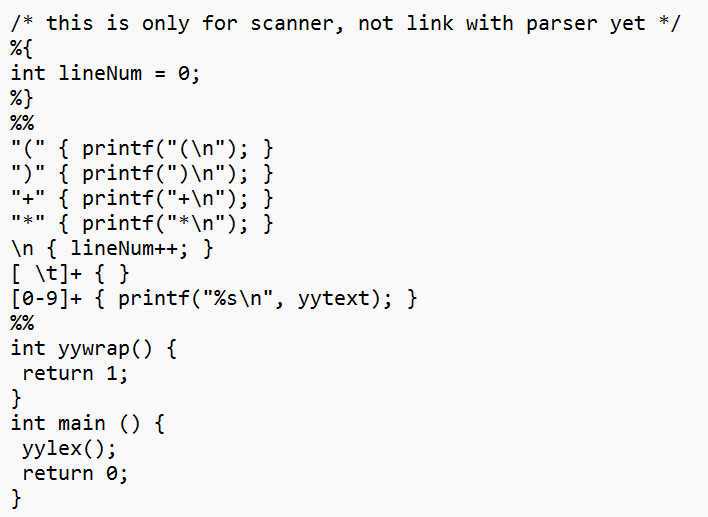



Here is the Makefile used to build the scanner:


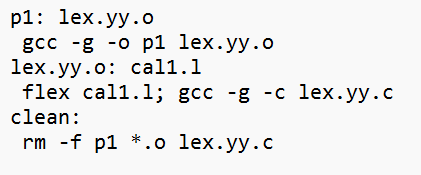

Bison is a LALR(1) parser generator tool for syntax analysis, which is based
on pushdown automata (PDA). The input is a set of context-free grammar
(CFG) rules, and the output is the code to implement the parser according to
the input rules.
To implement a parser for calculator, we can write the file “cal.y” as below:
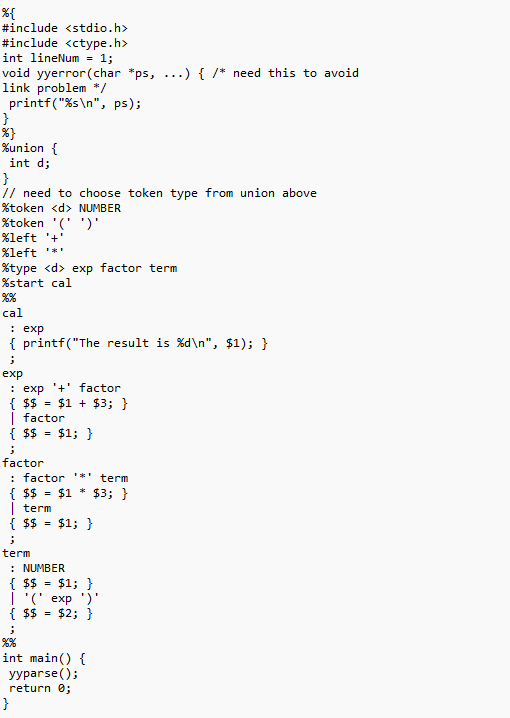

To integrate both the scanner and parser, we need to modify the scanner
input file “cal1.l” and save it as “cal.l” as below:
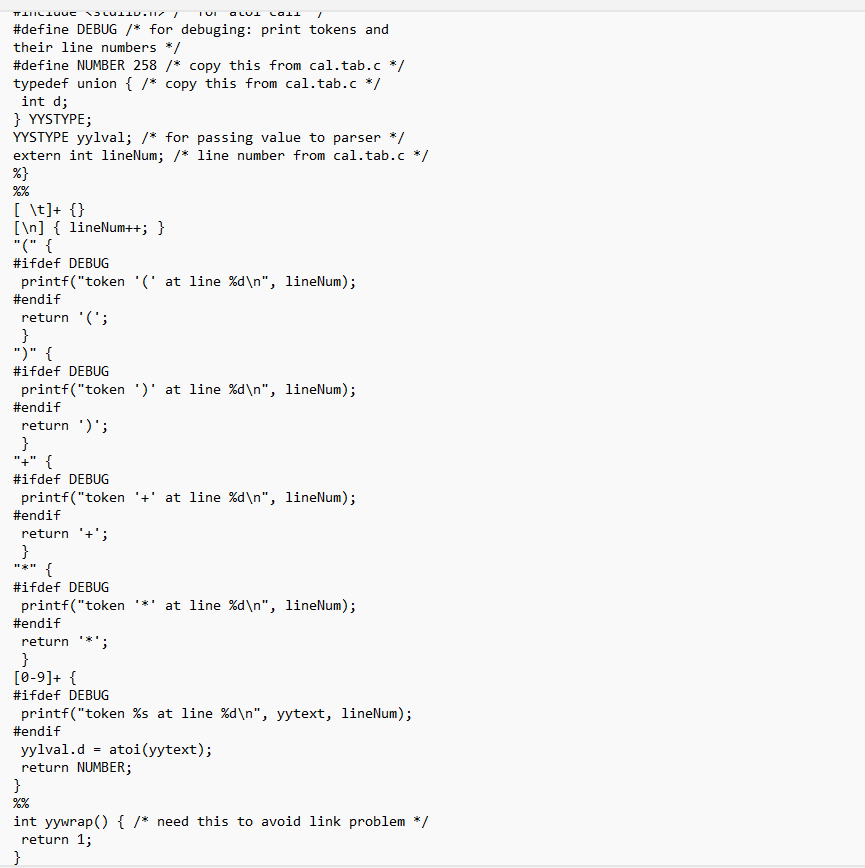